# Hauptkomponentenanalyse

## Datensatz

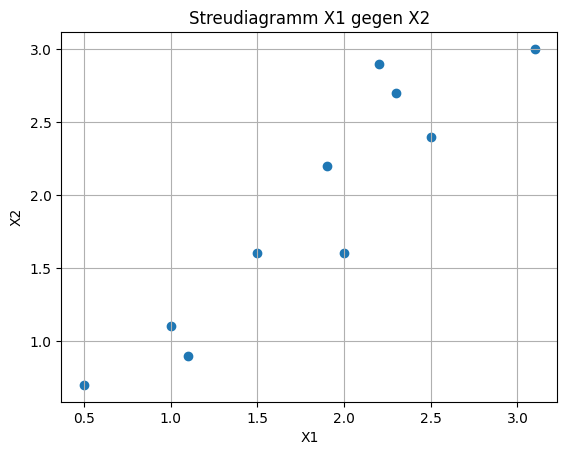

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'X1': [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1],
    'X2': [2.4, 0.7, 2.9, 2.2, 3, 2.7, 1.6, 1.1, 1.6, 0.9]
}

df = pd.DataFrame(data)

plt.scatter(df['X1'], df['X2'])
plt.title('Streudiagramm X1 gegen X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)

## Angepasster Datensatz

In [2]:
mean_X1 = df['X1'].mean()
mean_X2 = df['X2'].mean()

df['X1'] = df['X1'] - mean_X1
df['X2'] = df['X2'] - mean_X2

## Berechnen der Kovarianzmatrix

In [3]:
C = df.cov()

## Berechnen der Eigenwerte und Eigenvektoren

In [4]:
import numpy as np 

eigenwerte, eigenvektoren = np.linalg.eig(C)

### PC1

In [5]:
# PC1
PC1 = eigenvektoren[:, np.argmax(eigenwerte)]

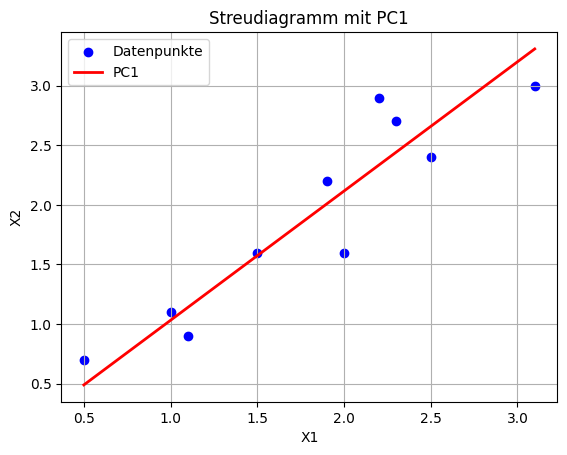

In [6]:
# Plotting the original scatter plot
orig_df = pd.DataFrame(data)
plt.scatter(orig_df['X1'], orig_df['X2'], color='blue', label='Datenpunkte')

# Calculating the line for PC1
# We'll use a line that passes through the mean of the data points and has the direction of PC1

# The line is defined by the equation (x - mean_X1) / PC1_normalized[0] = (y - mean_X2) / PC1_normalized[1]
# We need to plot this line within the range of our data
x_values = np.array([orig_df['X1'].min(), orig_df['X1'].max()])
y_values = mean_X2 + PC1[1] / PC1[0] * (x_values - mean_X1)

# Plot the line for PC1
plt.plot(x_values, y_values, color='red', linewidth=2, label='PC1')

# Set the plot labels and title
plt.title('Streudiagramm mit PC1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

### PC2

In [7]:
# PC2
PC2 = eigenvektoren[:, np.argmin(eigenwerte)]

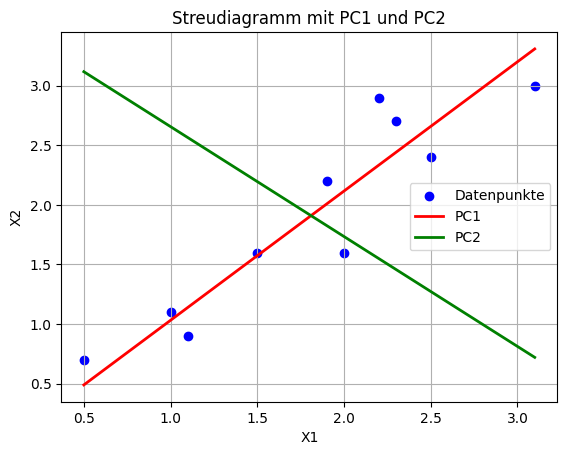

In [8]:
# Plotting the original scatter plot
plt.scatter(orig_df['X1'], orig_df['X2'], color='blue', label='Datenpunkte')

# Re-plotting the line for PC1
plt.plot(x_values, y_values, color='red', linewidth=2, label='PC1')

# Calculating the line for PC2
# The line is defined by the equation (x - mean_X1) / PC2_normalized[0] = (y - mean_X2) / PC2_normalized[1]
y_values_pc2 = mean_X2 + PC2[1] / PC2[0] * (x_values - mean_X1)

# Plot the line for PC2
plt.plot(x_values, y_values_pc2, color='green', linewidth=2, label='PC2')

# Set the plot labels and title
plt.title('Streudiagramm mit PC1 und PC2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

## Konstruktion des neuen Datensatzes

In [9]:
eigenvektor_matrix = np.column_stack((PC1, PC2))

transformed_data = np.dot(df, eigenvektor_matrix)

new_df = pd.DataFrame(transformed_data, columns=['y1', 'y2'])

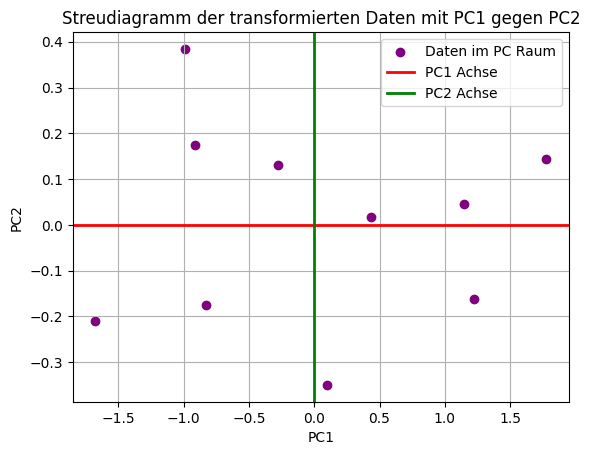

In [10]:
# Plotting the new dataset y1 against y2, which are the coordinates in terms of PC1 and PC2
plt.scatter(new_df['y1'], new_df['y2'], color='purple', label='Daten im PC Raum')

# Plot a horizontal line at y2=0 representing PC1 axis in the new space
plt.axhline(0, color='red', linewidth=2, label='PC1 Achse')

# Plot a vertical line at y1=0 representing PC2 axis in the new space
plt.axvline(0, color='green', linewidth=2, label='PC2 Achse')

# Set the plot labels and title
plt.title('Streudiagramm der transformierten Daten mit PC1 gegen PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()